# 0. Imports

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns # import the seaborn library
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import svm

# 1. Read the csv file and change the csv file into dataframe. Then print out the first five rows. 

In [30]:
#Read in our data and display it
data_frame = pd.read_csv("iot_dataset-1.csv")
print(data_frame.head())

      x1      x2      x3    x4    x5      x6    y
0  34.40 -16.400  2600.0  26.7  2.92  1950.0  0.0
1  30.40   1.140  1770.0  30.2  1.91  1030.0  1.0
2  19.90  -4.050  2430.0  29.9  2.25  1670.0  0.0
3  30.70   0.231  2330.0  25.6  2.29  1580.0  1.0
4   3.73  12.600   372.0  48.5  0.28  1040.0  0.0


# 2. Change the column names with feature names such as temperature, humidity, light, noise, motion, and device ID. 
The last column is the target column. Change the last column name to “class.” 

In [31]:
column_name = ["temperature","humidity","light","noise", "motion", "device id","class"] #sets column names
data_frame.columns = column_name
print(data_frame.head())

   temperature  humidity   light  noise  motion  device id  class
0        34.40   -16.400  2600.0   26.7    2.92     1950.0    0.0
1        30.40     1.140  1770.0   30.2    1.91     1030.0    1.0
2        19.90    -4.050  2430.0   29.9    2.25     1670.0    0.0
3        30.70     0.231  2330.0   25.6    2.29     1580.0    1.0
4         3.73    12.600   372.0   48.5    0.28     1040.0    0.0


# 3.  Print out the class distributions to find out about class imbalance.

In [32]:
class_dist = data_frame["class"].value_counts() #printing only the class data
class_dist

class
0.0    1000
1.0     999
Name: count, dtype: int64

# 4. Generate the Correlation Matrix plot. After the generation of the plot, create a text box where you need to explain this plot.

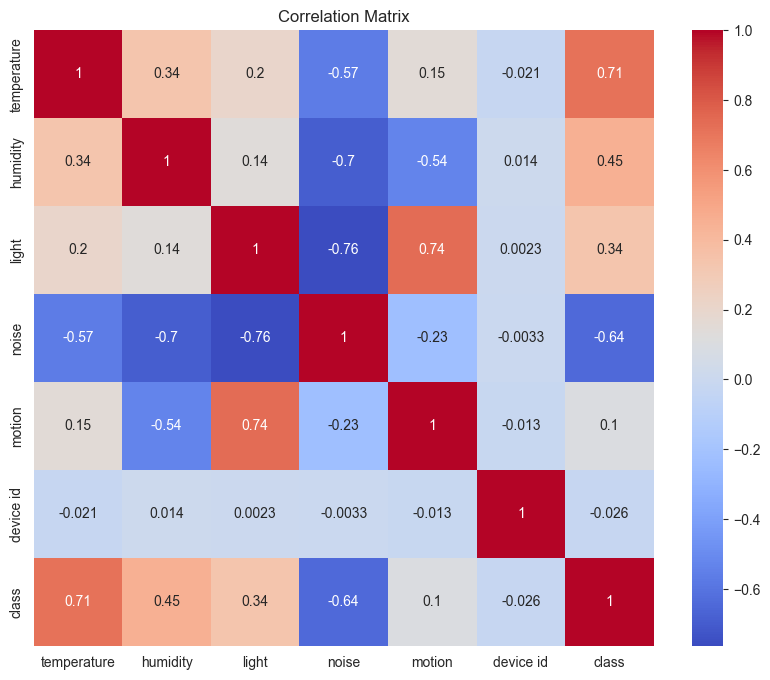

In [33]:
correlation_matrix = data_frame.corr() # using built in sns function to create a heatmap of our data

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

Explanation: Class and temperature are shown to have a strong positive correlation, where class and noise have a strong negative correlation. 
Light and motion also have a strong positive correlation, while noise has a strong negative correlation with humidity, light, and temperature.

# 5. Apply scaling to your dataset. After the scaling, print out the first five rows to check the applied scaling. 

In [34]:
#Remove class column so it doesnt get scaled
X = data_frame.drop('class', axis=1)
y = data_frame['class']  

#scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
data_frame_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#Add the column back 
data_frame_scaled['class'] = y

data_frame_scaled.head()

temperature  humidity     light     noise    motion  device id  class
0     1.031508 -0.928271  1.403794 -0.690312  2.014214   1.576464    0.0
1     0.735717 -0.402084  0.799490 -0.499532  1.085802  -1.618401    1.0
2    -0.040735 -0.557780  1.280021 -0.515885  1.398337   0.604114    0.0
3     0.757901 -0.429353  1.207214 -0.750271  1.435106   0.291573    1.0
4    -1.236470 -0.058292 -0.218362  0.497971 -0.412526  -1.583674    0.0

# 6. Generate a scatter plot of different features. 

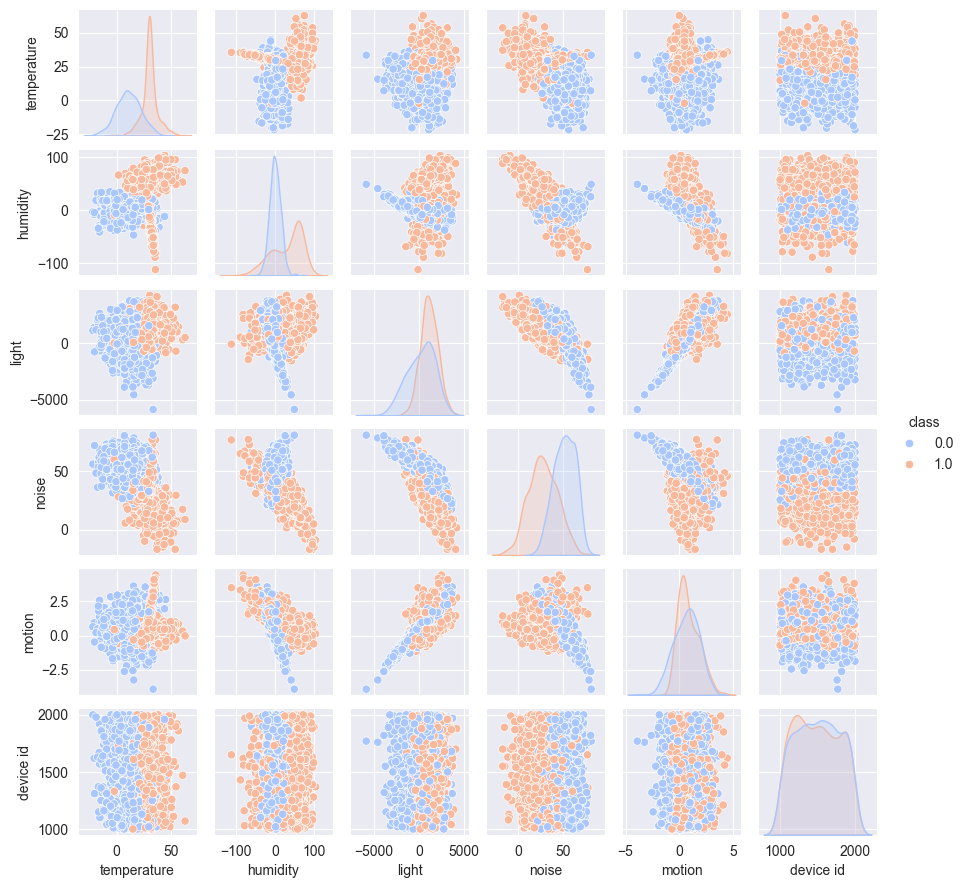

In [35]:
sns.pairplot(data_frame, hue='class', palette='coolwarm', markers=["o", "o",], height=1.5) #use built in sns method to create scatter plot
plt.show()

# 7. Generate the plot below to show the class distribution:

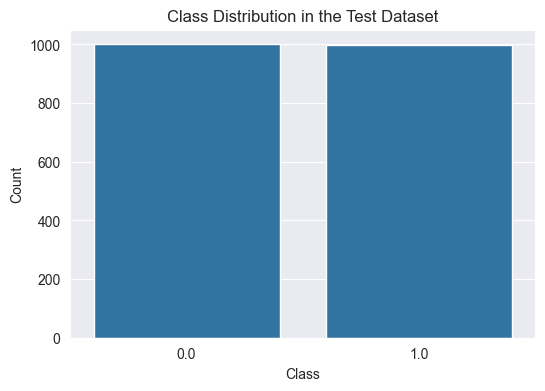

In [36]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=data_frame) #another built in sns method for creating bar graphs
plt.title('Class Distribution in the Test Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 8. Apply (train the model and test the model with test data) the logistic regression algorithm and print out performance metrics. 

In [37]:
#Drop class column before training
X = data_frame_scaled.drop('class', axis=1) 
y = data_frame_scaled['class']  

#Logistic regression model and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred, target_names=['0.0', '1.0'])
print(report)

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       207
         1.0       0.89      0.95      0.92       193

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400


Since the model for question 8 is a logistic regression, the
precission is supposed to be high. Recall will also be high as decision boundary fits with the distribution. The F1 score will be high as the precision and recall are both high. Because all the data above was predicted well, the accuracy will be high as a result.

# 9. Apply (train the model and test the model with test data) the knn algorithm and print out performance metrics. 

In [38]:
#Drop class column before training
X = data_frame.drop('class', axis=1)  
y = data_frame['class'] 

#Built in knn method and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

report = classification_report(y_test, y_pred, target_names=['0.0', '1.0'])
print(report)

              precision    recall  f1-score   support

         0.0       0.69      0.68      0.68       207
         1.0       0.66      0.67      0.66       193

    accuracy                           0.67       400
   macro avg       0.67      0.67      0.67       400
weighted avg       0.67      0.67      0.67       400


Because our "k" parameter for the knn model is moderately sized, the precision will also be moderately size. In knn, the recall value is based on how well neighbors correspond to positive results. Because both precision and recall are similarly balanced, F1 score will also take on a similar value. The accuracy of knn is dependent on the "k" parameter. A high accuracy would indicate that k parameter is not needing of change.

# 10. Apply (train the model and test the model with test data) the SVM model and print out performance metrics. 

In [39]:
#Drop class column before training
X = data_frame.drop('class', axis=1)  
y = data_frame['class'] 

#Built in model and training for svm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = svm.LinearSVC()

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

report = classification_report(y_test, y_pred, target_names=['0.0', '1.0'])
print(report)

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.92       207
         1.0       0.88      0.95      0.92       193

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400


If the data that the SVM model trains on is linear, SVM will usually have high precision. The recall value is high because the SVM is capturing correct positive values. The F1 Score is high for the same reason the other models also have their respected F1 Score. The accuracy for the svm model is also high because of the type of model choice for the data.

# 11. Analysis
While both the SVM model and the Logistic Regression model have very close outputs, the precision of the Logistic Regression model is slightly better for "1.0". The main category we would compare these models with is the accuracy category. The SVM model and Logistic Regression model are exactly the same for these categories. The F-1 score, which shows a balance between precision and recall is also the exact same for both of these models. I would personally use Logistic Regression unless the dataset it too large, and then I would recommend using SVM.